<a href="https://colab.research.google.com/github/ahmedmekled/Alpha-ML/blob/main/MinaPharm_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Minapharm ML Engineer Technical Assesment:</h2> 

<h4>Objective:</h4>
You are provided with a medical related dataset, containing 5k articles. You are required to demonstrate your NLP, data-mining & topic extraction skills to extract the topics that are included within the dataset along with mapping each article to the corresponding topic names. Each document should be matched to the top three most relevant topic names including the matching probability score.
Kindly, mention how you came up with the optimum number of topics extracted and a final evaluation statement of your work.


<h4>Requirements:</h4>

   - It is recommended to use Python/R + LDA for topic name extraction. If you use other technology, you must mention your reasoning for your choice.   

   - Document your code and communicate your overall evaluation of the problem at hand   
   - You are expected to include along with your solution a report explaining:   
   
      - Tools used
      - All performed steps, reasoning and outcomes
      - How you can further improve the results
      - How to further clean & optimize the data-sets to improve the performance of the LDA algorithm
      - Metrics used or to use if any to measure/ improve quality of results?


<h2>Dataset:</h2>

[Pubmed5k.rar](https://www.minapharm.com/gShare/Pubmed5k.rar)

<h2>Table of content</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#pre_processing">Data Preprocessing</a>
        <ul>
            <li><a href="#import">Importing basic Libraries</a></li>
            <li><a href="#read">Reading the data</a></li>
            <li><a href="#filter">Data filtering & cleaning</a></li>
        </ul>
    </li>
    <li><a href="#nlp">NLP phase</a></li>
    <li><a href="#class">Classification</a></li>
    <li><a href="#opt">Optmization</a></li>
    <li><a href="#future">Future Work</a></li>

</ul>
    
</div>
 
<hr>

<h1 id="pre_processing"> Data Preprocessing </h1>

## Importing basic Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

## Reading the data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
df = pd.read_excel("/content/Pubmed5k.xlsx")
df

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...
...,...,...,...
4994,34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...
4995,34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...
4996,34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...
4997,34444571,Pre-Intervention Effects of a Community-Based ...,This study explores the impact of the 'pre-int...


## Data filtering and cleaning

**Checking the type of data fro each dataframe**

In [3]:
df.dtypes

ArticleID     int64
Title        object
Abstract     object
dtype: object

**Checking NaNs**

In [4]:
df.isnull().values.any()

False

**Checking duplicates**

In [5]:
series = df.duplicated(keep=False).__eq__(True)
df.duplicated(keep=False).__getitem__(series)

Series([], dtype: bool)

**Re-checking for any uniqueness in the Title column** 

In [6]:
len(df["Title"].unique())

4999

**Fetch word count for each Title & Abstract**

In [7]:
#Fetch wordcount for each Title & Abstract
Title_Word_Count = []
Abstract_Word_Count = []
Title_Word_Count = df['Title'].apply(lambda x: len(str(x).split(" ")))
Abstract_Word_Count = df['Abstract'].apply(lambda x: len(str(x).split(" ")))

**Descriptive statistics of word counts**

In [8]:
print("Title_Word_Count description:")
print(Title_Word_Count.describe())
print("\n")
print("Abstract_Word_Count description:")
print(Abstract_Word_Count.describe())

Title_Word_Count description:
count    4999.000000
mean       14.911982
std         4.981343
min         1.000000
25%        11.000000
50%        15.000000
75%        18.000000
max        39.000000
Name: Title, dtype: float64


Abstract_Word_Count description:
count    4999.000000
mean      211.240448
std        80.544815
min         1.000000
25%       158.000000
50%       208.000000
75%       253.000000
max       976.000000
Name: Abstract, dtype: float64


**Identify common & uncommon words for each Title**

In [9]:
#Identify common words for each Title
freq = pd.Series(' '.join(df['Title']).split()).value_counts()[:30]
c_count = pd.DataFrame(freq)
c_count.reset_index(inplace = True)
c_count.rename(columns = {'index':'Words_Before', 0:'Count'}, inplace = True)
c_count.head()

,Words_Before,Count
0,of,4161
1,and,2980
2,in,2731
3,the,1974
4,a,1167


In [10]:
#Identify uncommon words for each Title
nfreq =  pd.Series(' '.join(df 
         ['Title']).split()).value_counts()[-30:]
n_count = pd.DataFrame(nfreq)
n_count.reset_index(inplace = True)
n_count.rename(columns = {'index':'Words_Before', 0:'Count'}, inplace = True)
n_count.head()

,Words_Before,Count
0,measles,1
1,progressive,1
2,midst,1
3,tasks,1
4,present,1


**Changing all the charecters to lower-case in both the Abstract & Title**

In [11]:
df['Title'] = df['Title'].str.lower()
df['Abstract'] = df['Abstract'].str.lower()

**Identify common & uncommon words for each Title after lower-casing**

In [12]:
#Identify common words for each Title
freq = pd.Series(' '.join(df['Title']).split()).value_counts()[:30]
c_count2 = pd.DataFrame(freq)
c_count2.reset_index(inplace = True)
c_count2.rename(columns = {'index':'Words_After', 0:'Count'}, inplace = True)
c_count = pd.concat([c_count, c_count2], axis=1)

In [13]:
c_count.head()

,Words_Before,Count,Words_After,Count
0,of,4161,of,4257
1,and,2980,and,3026
2,in,2731,in,2807
3,the,1974,the,2378
4,a,1167,a,1945


**As we can see, there is a segnificant change here after lower-casing the characters**

In [14]:
#Identify uncommon words for each Title
nfreq =  pd.Series(' '.join(df 
         ['Title']).split()).value_counts()[-30:]
n_count2 = pd.DataFrame(nfreq)
n_count2.reset_index(inplace = True)
n_count2.rename(columns = {'index':'Words_After', 0:'Count'}, inplace = True)
n_count = pd.concat([n_count, n_count2], axis=1)

In [15]:
n_count.head()

,Words_Before,Count,Words_After,Count
0,measles,1,peste,1
1,progressive,1,des,1
2,midst,1,petits,1
3,tasks,1,ruminants,1
4,present,1,livestock,1


**Also, it is very segnifican here that the least frequent words changed after altering the case sensitivity**

In [16]:
dff = copy.deepcopy(df)
dff

,ArticleID,Title,Abstract
0,34153941,stable coordination variability in overground ...,coordination variability (cv) is commonly anal...
1,34153942,weak hip strength increases dynamic knee valgu...,clinical scenario: dynamic knee valgus (dkv) i...
2,34153964,current and future projections of amyotrophic ...,various methodologies have been reported to as...
3,34153968,disparities between asian and non-asian thromb...,as outcomes for acute ischemic stroke (ais) va...
4,34153978,maternal factors predicting loss to follow-up ...,because hearing loss in children can result in...
...,...,...,...
4994,34444567,mind the differences: how diagnoses and hospit...,integrated care pathway (icp) is a prevailing ...
4995,34444568,the ethics of dying: deciphering pandemic-resu...,the objective of medicine is to provide humans...
4996,34444569,research on adolescents regarding the indirect...,this research involved the participation of 30...
4997,34444571,pre-intervention effects of a community-based ...,this study explores the impact of the 'pre-int...


## <hr>

## NLP phase

<h2>The main steps of text processing:</h2>

    1- Tokenization: Segregation of the text into its individual constitutent words.
    
    2- Stopwords: Throw away any words that occur too frequently as its frequency of occurrence will not be useful in helping detecting relevant texts. (as an aside also consider throwing away words that occur very infrequently).

    3- Stemming: combine variants of words into a single parent word that still conveys the same meaning

    4- Vectorization: Map all the tokens in data into vectors for ease of feeding into models
    

<h1>a- Tokenization:

The concept of tokenization is the act of taking a sequence of characters in a given document and dicing it up into its individual constituent pieces, which are the eponymous **tokens** of this method.

## Importing all the libraries that will be used in this section

In [17]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
!pip install spacy
!pip install scispacy
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.2.0/en_core_web_md-3.2.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz

import scispacy
import spacy
import en_core_sci_lg
import en_core_web_md

from scipy.spatial.distance import jensenshannon

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from tqdm import tqdm
from os.path import isfile

**Loading Spacy** 

[spaCy](https://spacy.io/usage/spacy-101) *is a free, open-source library for advanced Natural Language Processing (NLP) in Python.*

There are 3 model size:
> Model size indicator:
>> **sm:** no word vectors <br>
>> **md:** reduced word vector table with 20k unique vectors for ~500k words<br>
>> **lg:** large word vector table with ~500k entriesUsing the lg

**Here we will be using "lg" model as it gives more dimensionality and complexity** <br>
*Also because the other model gave less compitability in comparison to this one*

In [25]:
#nlp = en_core_sci_lg.load(disable=["tagger", "parser", "ner"])
nlp = spacy.load("en_core_sci_lg")
nlp.max_length = 3000000

**Lemmatizing**

In [23]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

**Tokenizing and Vectorizing**

In [26]:
text = dff["Abstract"]
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
data_vectorized = vectorizer.fit_transform(tqdm(text))

100%|██████████| 4999/4999 [04:34<00:00, 18.22it/s]


**Plotting the most 20 most frequent words in all the dataset**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


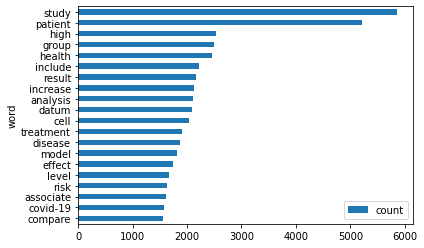

In [37]:
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]});

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh');

**Saving the output to a csv file**

In [38]:
joblib.dump(vectorizer, 'vectorizer.csv')
joblib.dump(data_vectorized, 'data_vectorized.csv')

['data_vectorized.csv']

**Perfoming LDA and save it to a csv aswell** - same idea as using pickle.

In [136]:
lda = LatentDirichletAllocation(n_components=50, random_state=0)
# Learn model for the data with variational Bayes method.
lda.fit(data_vectorized)
joblib.dump(lda, 'lda.csv')

['lda.csv']

In [141]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(lda, vectorizer, n_top_words=25)

**Transforming the data according to the fitted model.**

In [41]:
doc_topic_dist = pd.DataFrame(lda.transform(data_vectorized))
doc_topic_dist.to_csv('doc_topic_dist.csv', index=False)

In [180]:
doc_topic_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000339,0.000339,0.000339,0.000339,0.214221,0.000339,0.156217,0.000339,0.000339,0.000339,...,0.000339,0.555602,0.000339,0.000339,0.000339,0.000339,0.000339,0.000339,0.066842,0.000339
1,0.166987,0.000357,0.000357,0.000357,0.664610,0.000357,0.000357,0.000357,0.000357,0.051726,...,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.109177,0.000357
2,0.000310,0.000310,0.000310,0.000310,0.333076,0.063049,0.000310,0.000310,0.000310,0.000310,...,0.000310,0.557962,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310,0.000310
3,0.000223,0.000223,0.000223,0.028358,0.000223,0.000223,0.000223,0.000223,0.025565,0.000223,...,0.000223,0.000223,0.000223,0.000223,0.000223,0.000223,0.000223,0.227454,0.000223,0.000223
4,0.592142,0.000392,0.000392,0.000392,0.000392,0.202334,0.000392,0.000392,0.000392,0.000392,...,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.196897,0.000392,0.000392,0.000392


**Choosing the optimal distance calculation:**<br>
* Euclidean
* Correlation
* Jensen-Shannon
* Cosine
* Cityblock

##### Euclidean

In [108]:
from scipy.spatial.distance import euclidean
e = doc_topic_dist.apply(lambda x: euclidean(x, y), axis=1)
k_nearest = e[e != 0].nsmallest(n=5).index
k_distances = d[d != 0].nsmallest(n=5)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
1487,34411111,a new neutrosophic sign test: an application t...,the sign test is a famous nonparametric test f...,NaN
2766,34706043,cross-cultural adaptation and psychometric pro...,translate and culturally adapt the short versi...,NaN
1014,34332592,psychometric properties of the short form of t...,the short form of the stroke impact scale (sf-...,NaN
1109,34351914,eco-hydrology as a driver for tidal restoratio...,land reclamation projects and the installation...,NaN
1990,34520914,fuzzy evaluation of the ecological security of...,the extensive exploitation and use of land res...,NaN


##### Correlation

In [106]:
from scipy.spatial.distance import correlation
z = doc_topic_dist.apply(lambda x: correlation(x, y), axis=1)
k_nearest = z[z != 0].nsmallest(n=10).index
k_distances = d[d != 0].nsmallest(n=10)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,ArticleID,Title,Abstract,similarity
3406,34170963,validation of the multidimensional assessment ...,"interoception refers to the sensation, interpr...",0.787686
1126,34351932,non-territorial gps-tagged golden eagles aquil...,wind farms can have two broad potential advers...,0.784022
3778,34243009,effects of ecological protection and restorati...,traditional lake phytoplankton diversity studi...,0.784558
4708,34419920,quantification of multi-scale links of anthrop...,aquatic ecosystems are exposed to multiple env...,0.783328
4934,34444471,modeling and mapping of combined noise annoyan...,complex transportation systems often produce c...,0.784695
2385,34613975,no effect of 'watching eyes': an attempted rep...,some evidence suggests that people behave more...,0.784277
4569,34380095,budget of riverine nitrogen over the east chin...,riverine nitrogen loading to the continental s...,0.784214
2007,34521002,exploring the relationship between production ...,shrimp are one of the fastest growing commodit...,0.766172
1109,34351914,eco-hydrology as a driver for tidal restoratio...,land reclamation projects and the installation...,0.761577
1487,34411111,a new neutrosophic sign test: an application t...,the sign test is a famous nonparametric test f...,NaN


##### Jensen–Shannon

In [119]:
y = doc_topic_dist[dff.ArticleID == 34153941].iloc[0]
d = doc_topic_dist.apply(lambda x: jensenshannon(x, y), axis=1)
k_nearest = d[d != 0].nsmallest(n=5).index
k_distances = d[d != 0].nsmallest(n=5)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
4229,34321539,demonstration of central conduction time and n...,a randomized controlled study was conducted to...,0.793207
3406,34170963,validation of the multidimensional assessment ...,"interoception refers to the sensation, interpr...",0.787686
4934,34444471,modeling and mapping of combined noise annoyan...,complex transportation systems often produce c...,0.784695
3778,34243009,effects of ecological protection and restorati...,traditional lake phytoplankton diversity studi...,0.784558
2385,34613975,no effect of 'watching eyes': an attempted rep...,some evidence suggests that people behave more...,0.784277


##### Cosine

In [111]:
from scipy.spatial.distance import cosine
e = doc_topic_dist.apply(lambda x: cosine(x, y), axis=1)
k_nearest = e[e != 0].nsmallest(n=8).index
k_distances = d[d != 0].nsmallest(n=8)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
3406,34170963,validation of the multidimensional assessment ...,"interoception refers to the sensation, interpr...",0.787686
4934,34444471,modeling and mapping of combined noise annoyan...,complex transportation systems often produce c...,0.784695
3778,34243009,effects of ecological protection and restorati...,traditional lake phytoplankton diversity studi...,0.784558
2385,34613975,no effect of 'watching eyes': an attempted rep...,some evidence suggests that people behave more...,0.784277
4569,34380095,budget of riverine nitrogen over the east chin...,riverine nitrogen loading to the continental s...,0.784214
1126,34351932,non-territorial gps-tagged golden eagles aquil...,wind farms can have two broad potential advers...,0.784022
4708,34419920,quantification of multi-scale links of anthrop...,aquatic ecosystems are exposed to multiple env...,0.783328
1109,34351914,eco-hydrology as a driver for tidal restoratio...,land reclamation projects and the installation...,NaN


##### Cityblock

In [110]:
from scipy.spatial.distance import cityblock
e = doc_topic_dist.apply(lambda x: cityblock(x, y), axis=1)
k_nearest = e[e != 0].nsmallest(n=8).index
k_distances = d[d != 0].nsmallest(n=8)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
4934,34444471,modeling and mapping of combined noise annoyan...,complex transportation systems often produce c...,0.784695
3778,34243009,effects of ecological protection and restorati...,traditional lake phytoplankton diversity studi...,0.784558
1487,34411111,a new neutrosophic sign test: an application t...,the sign test is a famous nonparametric test f...,NaN
2385,34613975,no effect of 'watching eyes': an attempted rep...,some evidence suggests that people behave more...,0.784277
4569,34380095,budget of riverine nitrogen over the east chin...,riverine nitrogen loading to the continental s...,0.784214
1126,34351932,non-territorial gps-tagged golden eagles aquil...,wind farms can have two broad potential advers...,0.784022
2766,34706043,cross-cultural adaptation and psychometric pro...,translate and culturally adapt the short versi...,NaN
2007,34521002,exploring the relationship between production ...,shrimp are one of the fastest growing commodit...,NaN


#### Implementing a function to get the nearest topics same idea as **KNN**

**Using Jensen–Shannon as it the most optimal one with no NaNs and using it in the KND "K Nearest Docs" function below**

In [90]:
def get_k_nearest_docs(doc_dist, k=5, get_dist=False):
    '''
    doc_dist: topic distribution (sums to 1) of one article
    
    Returns the index of the k nearest articles (as by Jensen–Shannon divergence in topic space). 
    '''
    temp = doc_topic_dist     
    distances = temp.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
    k_nearest = distances[distances != 0].nsmallest(n=k).index
    
    if get_dist:
        k_distances = distances[distances != 0].nsmallest(n=k)
        return k_nearest, k_distances
    else:
        return k_nearest

**Implementing a function to return the desired number of the articles based on the nearest probability.**

In [91]:
def recommendation(paper_id, k=5):
    '''
    Returns the title of the k papers that are closest (topic-wise) to the paper given by paper_id.
    '''
    
    print(dff.Abstract[dff.ArticleID == paper_id].values[0])

    recommended, dist = get_k_nearest_docs(doc_topic_dist[dff.ArticleID == paper_id].iloc[0], k, get_dist=True)
    recommended = dff.iloc[recommended].copy()
    recommended['similarity'] = 1 - dist 
    
    h = '<br/>'.join(['<a target="_blank">'+ n + '</a>' +' (Similarity: ' + "{:.2f}".format(s) + ')' for n, s in recommended[['Title', 'similarity']].values])
    display(HTML(h))
    

**Testing for any article based on the ArticleID as shown below:**

In [120]:
recommendation(34153941, k=3)

coordination variability (cv) is commonly analyzed to understand dynamical qualities of human locomotion. the purpose of this study was to develop guidelines for the number of trials required to inform the calculation of a stable mean lower limb cv during overground locomotion. three-dimensional lower limb kinematics were captured for 10 recreational runners performing 20 trials each of preferred and fixed speed walking and running. stance phase cv was calculated for 9 segment and joint couplings using a modified vector coding technique. the number of trials required to achieve a cv mean within 10% of 20 strides average was determined for each coupling and individual. the statistical outputs of mode (walking vs running) and speed (preferred vs fixed) were compared when informed by differing numbers of trials. a minimum of 11 trials were required for stable mean stance phase cv. with fewer than 11 trials, cv was underestimated and led to an oversight of significant differences between m

In [18]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
## Preprocessing def
##Stemming
ps=PorterStemmer()
#Lemmatisation
lem = WordNetLemmatizer()

def preprocess(data, action):
  corpus = []
  for i in range(0, len(data)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Abstract'][i])
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    if action == 0:
      text = [ps.stem(word) for word in text if not word in  
              stopwords.words('english')]
      text = " ".join(text)
      corpus.append(text)
    else:
      text = [lem.lemmatize(word) for word in text if not word in  
              stopwords.words('english')]
      text = " ".join(text)
      corpus.append(text)

  return corpus

In [ ]:
## Sample of Stemming
s_corpus = preprocess(dff, 0)
s_corpus[0]

'coordin variabl cv commonli analyz understand dynam qualiti human locomot purpos studi develop guidelin number trial requir inform calcul stabl mean lower limb cv overground locomot three dimension lower limb kinemat captur recreat runner perform trial prefer fix speed walk run stanc phase cv calcul segment joint coupl use modifi vector code techniqu number trial requir achiev cv mean within stride averag determin coupl individu statist output mode walk vs run speed prefer vs fix compar inform differ number trial minimum trial requir stabl mean stanc phase cv fewer trial cv underestim led oversight signific differ mode speed futur overground locomot cv research healthi popul use vector code approach use trial standard minimum research awar notabl consequ insuffici number trial overal studi find'

In [20]:
## Sample of Lemmatizing
corpus = preprocess(dff, 1)
corpus[0]

'clinical scenario dynamic knee valgus dkv mechanical alteration knee lead increased risk injury weakness hip musculature hip abduction habd extension hext external rotation may contribute increased dkv single leg landing task focused clinical question decreased hip strength associated increase dkv single leg landing task collegiate female athlete summary key finding three study included one randomized control trial rct one cohort study one case control three study found decrease habd strength contributed increased dkv single leg landing task one study also found hip extensor contribute controlling hip adduction common factor many mechanism injury three study recommended strengthening habd hext decrease dkv reduce risk injury knee clinical bottom line weak habd hext contribute increased dkv college female athlete strengthening habd hext lead decrease dkv overall reduce risk injury knee strength recommendation article graded level evidence iii higher giving grade b strength recommendati

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [ ]:
## This is the number of words in all of the Abstract column
len(X[0])

35667

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.datasets import fetch_20newsgroups
fetch_20newsgroups

<function sklearn.datasets._twenty_newsgroups.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)>

In [ ]:
print(list(fetch_20newsgroups.target_names))

AttributeError: 'function' object has no attribute 'target_names'

In [22]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [23]:
stemmer = SnowballStemmer("english")

In [25]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [26]:
processed_docs = []

for doc in corpus:
    processed_docs.append(preprocess(doc))

In [34]:
print(processed_docs[0])

['coordin', 'variabl', 'common', 'analyz', 'understand', 'dynam', 'qualiti', 'human', 'locomot', 'purpos', 'studi', 'develop', 'guidelin', 'number', 'trial', 'requir', 'inform', 'calcul', 'stabl', 'mean', 'lower', 'limb', 'overground', 'locomot', 'dimension', 'lower', 'limb', 'kinemat', 'captur', 'recreat', 'runner', 'perform', 'trial', 'prefer', 'fix', 'speed', 'walk', 'run', 'stanc', 'phase', 'calcul', 'segment', 'joint', 'coupl', 'modifi', 'vector', 'cod', 'techniqu', 'number', 'trial', 'requir', 'achiev', 'mean', 'stride', 'averag', 'determin', 'coupl', 'individu', 'statist', 'output', 'mode', 'walk', 'run', 'speed', 'prefer', 'fix', 'compar', 'inform', 'differ', 'number', 'trial', 'minimum', 'trial', 'requir', 'stabl', 'mean', 'stanc', 'phase', 'fewer', 'trial', 'underestim', 'oversight', 'signific', 'differ', 'mode', 'speed', 'futur', 'overground', 'locomot', 'research', 'healthi', 'popul', 'vector', 'cod', 'approach', 'trial', 'standard', 'minimum', 'research', 'awar', 'notabl',

In [32]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [36]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 achiev
1 averag
2 awar
3 calcul
4 captur
5 cod
6 consequ
7 coordin
8 coupl
9 dimension
10 dynam


In [37]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [38]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [40]:
document_num = 1
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 10 ("dynam") appears 1 time.
Word 26 ("overal") appears 1 time.
Word 37 ("trial") appears 1 time.
Word 42 ("alter") appears 1 time.
Word 43 ("articl") appears 1 time.
Word 44 ("cohort") appears 1 time.
Word 45 ("colleg") appears 1 time.
Word 46 ("contribut") appears 4 time.
Word 47 ("decreas") appears 4 time.
Word 48 ("extens") appears 1 time.
Word 49 ("extern") appears 1 time.
Word 50 ("femal") appears 3 time.
Word 51 ("focus") appears 1 time.
Word 52 ("give") appears 1 time.
Word 53 ("grade") appears 2 time.
Word 54 ("injuri") appears 4 time.
Word 55 ("knee") appears 4 time.
Word 56 ("land") appears 3 time.
Word 57 ("lead") appears 2 time.
Word 58 ("line") appears 1 time.
Word 59 ("question") appears 1 time.
Word 60 ("random") appears 1 time.
Word 61 ("recommend") appears 3 time.
Word 62 ("rotat") appears 1 time.
Word 63 ("scenario") appears 1 time.
Word 64 ("singl") appears 3 time.
Word 65 ("strength") appears 4 time.
Word 66 ("strengthen") appears 2 time.
Word 67 ("summari") a

In [41]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [42]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.012*"month" + 0.012*"score" + 0.009*"cognit" + 0.009*"mortal" + 0.009*"week" + 0.009*"sever" + 0.008*"cohort" + 0.007*"receiv" + 0.007*"therapi" + 0.007*"baselin"


Topic: 1 
Words: 0.019*"protein" + 0.014*"express" + 0.011*"cancer" + 0.009*"infect" + 0.009*"gene" + 0.008*"drug" + 0.008*"induc" + 0.008*"sar" + 0.007*"immun" + 0.007*"regul"


Topic: 2 
Words: 0.009*"predict" + 0.009*"network" + 0.008*"imag" + 0.008*"propos" + 0.006*"applic" + 0.006*"brain" + 0.005*"task" + 0.005*"fatigu" + 0.005*"algorithm" + 0.005*"featur"


Topic: 3 
Words: 0.016*"speci" + 0.009*"water" + 0.008*"gene" + 0.008*"product" + 0.007*"environment" + 0.006*"exposur" + 0.006*"acid" + 0.006*"plant" + 0.006*"concentr" + 0.005*"area"


Topic: 4 
Words: 0.023*"vaccin" + 0.016*"student" + 0.015*"nurs" + 0.010*"pain" + 0.009*"social" + 0.008*"adolesc" + 0.008*"educ" + 0.008*"emot" + 0.008*"child" + 0.008*"dental"


Topic: 5 
Words: 0.009*"surgeri" + 0.008*"tissu" + 0.008*"surgic" + 0.008*"diagnosi